In [32]:
import numpy as np

In [33]:
import pandas as pd

In [62]:
import matplotlib.pyplot as plt

In [35]:
import seaborn as sns

## Loading the dataset

In [36]:
data = pd.read_csv('dataset/used_device_data.csv')

## Displaying the data

In [37]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64


In [38]:
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,654.50,89.33
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,518.81,154.12
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,92.65,78.05
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,101.92,77.46
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,72.24,62.31


### Create a copy of the data

In [39]:
df = data.copy(deep =True)

In [40]:
## Understanding the dataset

df.index

RangeIndex(start=0, stop=3454, step=1)

In [41]:
df.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'new_price', 'used_price'],
      dtype='object')

In [42]:
df.shape

(3454, 15)

In [43]:
df.size

51810

In [44]:
df.dtypes

brand_name           object
os                   object
screen_size         float64
4g                   object
5g                   object
main_camera_mp      float64
selfie_camera_mp    float64
int_memory          float64
ram                 float64
battery             float64
weight              float64
release_year         object
days_used            object
new_price           float64
used_price          float64
dtype: object

In [45]:
df.nunique()

brand_name            34
os                     4
screen_size          142
4g                     2
5g                     2
main_camera_mp        41
selfie_camera_mp      37
int_memory            15
ram                   12
battery              324
weight               555
release_year           9
days_used            925
new_price           2988
used_price          3093
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   object 
 12  days_used         3454 non-null   object 
 13  new_price         3454 non-null   float64
 14  used_price        3453 non-null   float64
dtypes: float64(9), object(6)
memory usage: 404.9+ KB


In [47]:
## Select columns with numerical datatypes

df.select_dtypes(exclude= [object])

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,new_price,used_price
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,111.62,74.26
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,249.39,174.53
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,359.47,165.85
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,278.93,169.93
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,140.87,80.64
...,...,...,...,...,...,...,...,...,...
3449,15.34,NaN,8.0,64.0,6.0,5000.0,190.0,654.50,89.33
3450,15.24,13.0,8.0,128.0,8.0,4000.0,200.0,518.81,154.12
3451,15.80,13.0,5.0,32.0,3.0,4000.0,165.0,92.65,78.05
3452,15.80,13.0,5.0,32.0,2.0,4000.0,160.0,101.92,77.46


In [48]:
## checking the number of unique values in each columns (object)

print (np.unique (df['brand_name']))

['Acer' 'Alcatel' 'Apple' 'Asus' 'BlackBerry' 'Celkon' 'Coolpad' 'Gionee'
 'Google' 'HTC' 'Honor' 'Huawei' 'Infinix' 'Karbonn' 'LG' 'Lava' 'Lenovo'
 'Meizu' 'Micromax' 'Microsoft' 'Motorola' 'Nokia' 'OnePlus' 'Oppo'
 'Others' 'Panasonic' 'Realme' 'Samsung' 'Sony' 'Spice' 'Vivo' 'XOLO'
 'Xiaomi' 'ZTE']


In [49]:
print (np.unique (df['os']))

['Android' 'Others' 'Windows' 'iOS']


In [50]:
print (np.unique (df['4g']))

['no' 'yes']


In [51]:
print (np.unique (df['5g']))

['no' 'yes']


In [52]:
## Finding the number of missing values

df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            1
dtype: int64

## Exploratory Data Analysis


In [53]:
## Using frequency table to check categorical datasets
pd.crosstab(index= df['os'], columns= 'counts', dropna= True)

col_0,counts
os,
Android,3214
Others,137
Windows,67
iOS,36


In [54]:
pd.crosstab(index= df['4g'], columns= 'counts', dropna= True)

col_0,counts
4g,
no,1119
yes,2335


In [55]:
pd.crosstab(index= df['5g'], columns= 'counts', dropna= True)

col_0,counts
5g,
no,3302
yes,152


### Correlation

In [56]:
## selection of numerical columns

numerical_data= df.select_dtypes(exclude=[object])

In [57]:
print (numerical_data.shape)

(3454, 9)


In [58]:
corr_matrix= numerical_data.corr()
corr_matrix

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,new_price,used_price
screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.828890,0.340891,0.529277
main_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,0.358374,0.459085
selfie_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,0.415584,0.614689
int_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,0.369163,0.378286
ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,0.494253,0.529482
battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,0.370449,0.549722
weight,0.828890,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,0.219162,0.357892
new_price,0.340891,0.358374,0.415584,0.369163,0.494253,0.370449,0.219162,1.000000,0.809314
used_price,0.529277,0.459085,0.614689,0.378286,0.529482,0.549722,0.357892,0.809314,1.000000


In [59]:
 ##The relationship b/n phone price of a used_price and ram
plt.figure(figsize=(6, 4))

plt.scatter(df['ram'], df['used_price'], c = 'red')
plt.title('scatter plot of used_price Vs ram of phones')
plt.xlabel('ram')
plt.ylabel('used_price)')

plt.show()

TypeError: 'module' object is not callable

In [64]:
plt.figure(figsize=(6,4))

plt.scatter(df['ram'], df['used_price'], c='red')
plt.title('Scatter plot of used price Vs ram of phones')
plt.xlabel('ram')
plt.ylabel('used_price')

plt.show()

In [65]:
plt.figure(figsize=(6,4))

plt.scatter(df['selfie_camera_mp'], df['used_price'], c='red')
plt.title('Scatter plot of used price Vs selfie camera mp of phones')
plt.xlabel('selfie camera mp')
plt.ylabel('used_price')

plt.show()

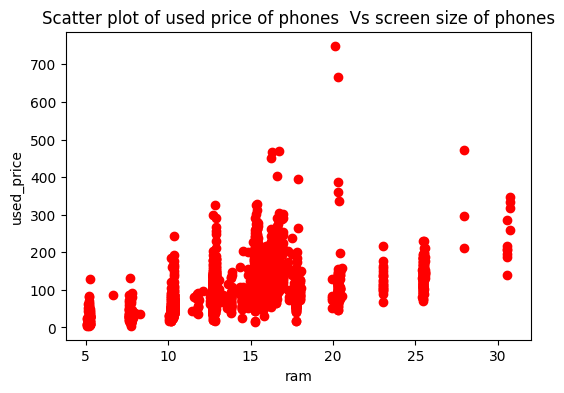

In [66]:
plt.figure(figsize=(6,4))

plt.scatter(df['screen_size'], df['used_price'], c='red')
plt.title('Scatter plot of used price of phones  Vs screen size of phones')
plt.xlabel('ram')
plt.ylabel('used_price')

plt.show()

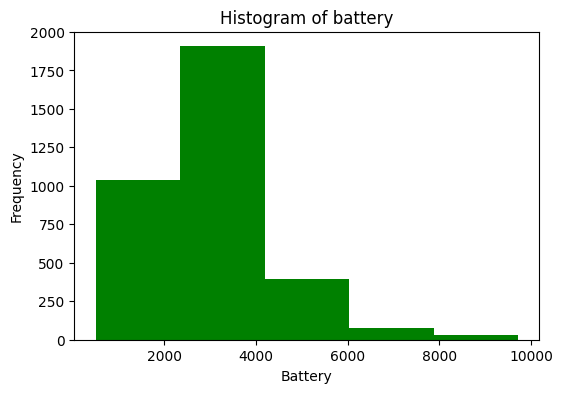

In [67]:
plt.figure(figsize= (6,4))
plt.hist(df['battery'],color='green', bins=5)
plt.title('Histogram of battery')
plt.xlabel('Battery')
plt.ylabel('Frequency')

plt.show()

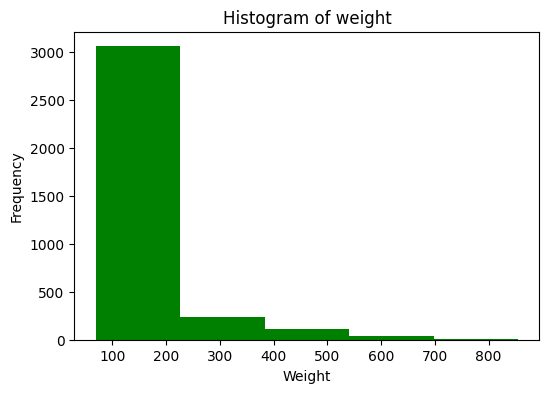

In [68]:
plt.figure(figsize= (6,4))
plt.hist(df['weight'],color='green', bins=5)
plt.title('Histogram of weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.show()

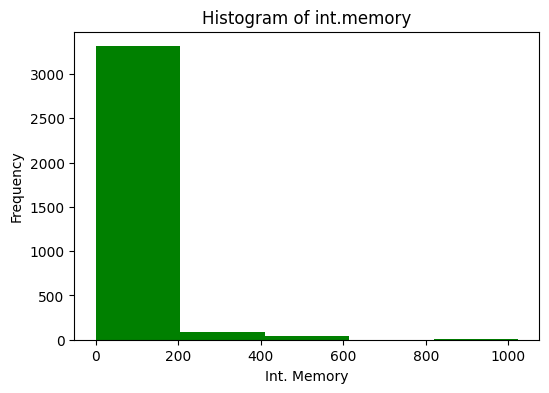

In [69]:
plt.figure(figsize= (6,4))
plt.hist(df['int_memory'],color='green', bins=5)
plt.title('Histogram of int.memory')
plt.xlabel('Int. Memory')
plt.ylabel('Frequency')

plt.show()

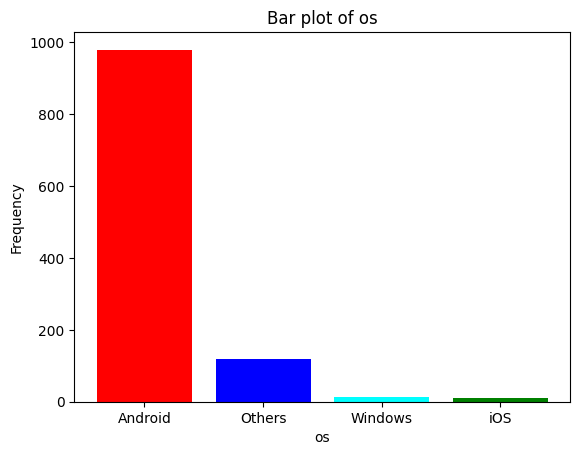

In [73]:
## Bar chart for categorical columns
counts= [979, 120,12, 10]
index= ['Android', 'Others' ,'Windows', 'iOS']

plt.bar(index, counts, color= ['red', 'blue','cyan', 'green'])

plt.title('Bar plot of os')
plt.xlabel('os')
plt.ylabel('Frequency')

plt.show()